In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
print("The shape of data frame:", df.shape)
print("Number of Rows in the dataframe:", len(df))
print("Number of Columns in the dataframe:", len(df.columns))

The shape of data frame: (1470, 35)
Number of Rows in the dataframe: 1470
Number of Columns in the dataframe: 35


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


std of EmployeeCount and StandardHours = 0, so they only contain one value.
Over18 is a redundant column since minimum age is 18.
EmployeeNumber happens to be unique for every entry, so not useful for analysis

In [8]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [9]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

<AxesSubplot:>

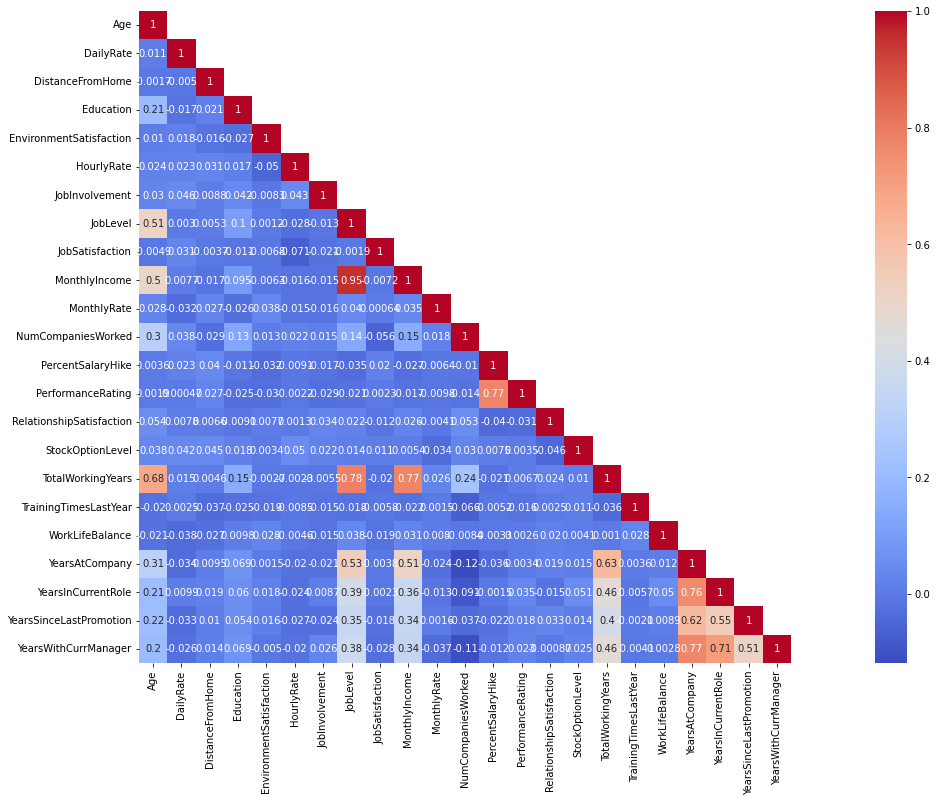

In [10]:
cor_mat= df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False #to visualize only one half of correlation matrix
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cmap='coolwarm',cbar=True)

In [11]:
df['IncomePerLevel'] = df['MonthlyIncome'] / df['JobLevel']
df.drop(['JobLevel', 'MonthlyIncome'], axis=1, inplace=True)

In [12]:
def transform(feature):
    le=LabelEncoder()
    df[feature]=le.fit_transform(df[feature])
    print(le.classes_)

In [13]:
cat_df=df.select_dtypes(include='object')
cat_df.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [14]:
for col in cat_df.columns:
    transform(col)

['No' 'Yes']
['Non-Travel' 'Travel_Frequently' 'Travel_Rarely']
['Human Resources' 'Research & Development' 'Sales']
['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
['Female' 'Male']
['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
['Divorced' 'Married' 'Single']
['No' 'Yes']


In [15]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,IncomePerLevel
0,41,1,2,1102,2,1,2,1,2,0,...,1,0,8,0,1,6,4,0,5,2996.5
1,49,0,1,279,1,8,1,1,3,1,...,4,1,10,3,3,10,7,1,7,2565.0
2,37,1,2,1373,1,2,2,4,4,1,...,2,0,7,3,3,0,0,0,0,2090.0
3,33,0,1,1392,1,3,4,1,4,0,...,3,0,8,3,3,8,7,3,0,2909.0
4,27,0,2,591,1,2,1,3,1,1,...,4,1,6,3,3,2,2,2,2,3468.0


In [16]:
df['PerformanceSalaryIndex'] = df['PerformanceRating'] * df['PercentSalaryHike']
df.drop(['PerformanceRating', 'PercentSalaryHike'], axis=1, inplace=True)

In [17]:
df['MeanYears'] = df[['YearsInCurrentRole', 'YearsAtCompany', 'YearsWithCurrManager']].mean(axis=1)

df.drop(['YearsInCurrentRole', 'YearsAtCompany', 'YearsWithCurrManager'], axis=1, inplace=True)

In [18]:
z_scores = (df - df.mean()) / df.std()
threshold = 3
outliers = (np.abs(z_scores) > threshold)

print("Indices of rows containing outliers:")
print(df.index[outliers.any(axis=1)])

outlier_values = df[outliers.any(axis=1)]
print("Outlier values:")
print(outlier_values)


Indices of rows containing outliers:
Int64Index([  45,   62,   64,   85,   98,  110,  123,  126,  178,  187,  190,
             218,  231,  237,  270,  326,  386,  401,  425,  427,  445,  535,
             561,  584,  595,  624,  653,  701,  749,  752,  799,  838,  861,
             875,  894,  914,  922,  926,  937,  956,  976, 1008, 1043, 1078,
            1086, 1093, 1116, 1138, 1156, 1184, 1221, 1223, 1242, 1295, 1301,
            1303, 1331, 1401, 1414],
           dtype='int64')
Outlier values:
      Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
45     41          1               2       1360           1                12   
62     50          0               2        989           1                 7   
64     36          0               2       1223           1                 8   
85     56          0               2       1400           1                 7   
98     58          0               2        682           2                10   
110    5

<AxesSubplot:>

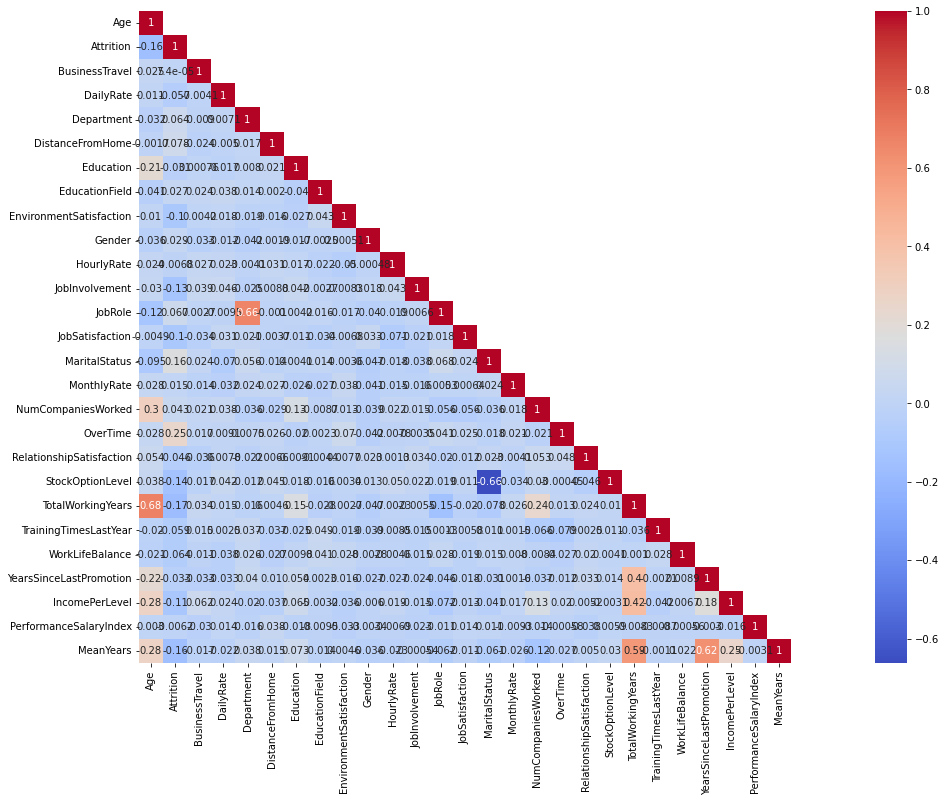

In [19]:
cor_mat= df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False #to visualize only one half of correlation matrix
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cmap='coolwarm',cbar=True)

In [20]:
# df['Outlier'] = outliers.any(axis=1)

# sns.pairplot(df, hue='Outlier', palette={True: 'red', False: 'blue'}, markers=['o', 's'])
# plt.show()

In [21]:
# scaler=StandardScaler()
# scaled_df=scaler.fit_transform(df.drop('Attrition',axis=1))
# X=scaled_df
# Y=df['Attrition']

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   int32  
 2   BusinessTravel            1470 non-null   int32  
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   int32  
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   int32  
 8   EnvironmentSatisfaction   1470 non-null   int64  
 9   Gender                    1470 non-null   int32  
 10  HourlyRate                1470 non-null   int64  
 11  JobInvolvement            1470 non-null   int64  
 12  JobRole                   1470 non-null   int32  
 13  JobSatisfaction           1470 non-null   int64  
 14  MaritalS

In [23]:
integer_columns = df.select_dtypes(include='int').columns
integer_columns = [col for col in integer_columns if col != 'Attrition']
df[integer_columns] = df[integer_columns].astype(float)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   float64
 1   Attrition                 1470 non-null   int32  
 2   BusinessTravel            1470 non-null   float64
 3   DailyRate                 1470 non-null   float64
 4   Department                1470 non-null   float64
 5   DistanceFromHome          1470 non-null   float64
 6   Education                 1470 non-null   float64
 7   EducationField            1470 non-null   float64
 8   EnvironmentSatisfaction   1470 non-null   float64
 9   Gender                    1470 non-null   float64
 10  HourlyRate                1470 non-null   float64
 11  JobInvolvement            1470 non-null   float64
 12  JobRole                   1470 non-null   float64
 13  JobSatisfaction           1470 non-null   float64
 14  MaritalS

Accuracy: 0.87

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       380
           1       0.56      0.23      0.33        61

    accuracy                           0.87       441
   macro avg       0.72      0.60      0.63       441
weighted avg       0.84      0.87      0.84       441


Confusion Matrix:
[[369  11]
 [ 47  14]]


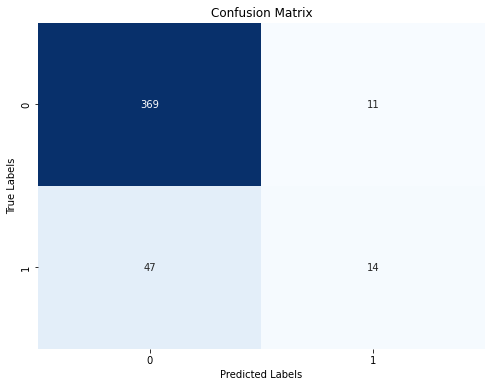

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the DataFrame into features (X) and target (y)
X = df.drop(columns=['Attrition'])  # Exclude the target column
y = df['Attrition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)

# Predict the labels for test set
y_pred = lda.predict(X_test_scaled)

# Evaluate the performance of the LDA model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate and print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate and plot confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_mat)

# Plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
